In [103]:
from sklearn import neighbors
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [117]:
df_ohe_var = pd.read_csv('C:\\Users\\jk\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\3-projekt-ml\\knn\\one_hot_encoded_var.csv')

df_ohe_corr = pd.read_csv('C:\\Users\\jk\\Desktop\\data science - infoshare\\projekt_SQL\\jdszr4-edc\\3-projekt-ml\\knn\\one_hot_encoded_corr.csv')


# Model dla danych przygotowanych z zastosowaniem one hot encodingu i wybranych na podstawie variance treshold

In [95]:
df_ohe_var.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe_var.drop(['class_e', 'class_p'], axis=1),
    df_ohe_var['class_p'],
    test_size=0.25,
    random_state=40)

KNeighborsClassifier: n = 1 , Accuracy is: 1.0
KNeighborsClassifier: n = 2 , Accuracy is: 1.0
KNeighborsClassifier: n = 3 , Accuracy is: 1.0
KNeighborsClassifier: n = 4 , Accuracy is: 1.0
KNeighborsClassifier: n = 5 , Accuracy is: 1.0
KNeighborsClassifier: n = 6 , Accuracy is: 1.0
KNeighborsClassifier: n = 7 , Accuracy is: 1.0
KNeighborsClassifier: n = 8 , Accuracy is: 1.0
KNeighborsClassifier: n = 9 , Accuracy is: 1.0
KNeighborsClassifier: n = 10 , Accuracy is: 1.0
KNeighborsClassifier: n = 11 , Accuracy is: 1.0
KNeighborsClassifier: n = 12 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 13 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 14 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 15 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 16 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 17 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 18 , Accuracy is: 0.999015263417036
KNeighborsClassifier: n = 19 , Accuracy is: 0.9

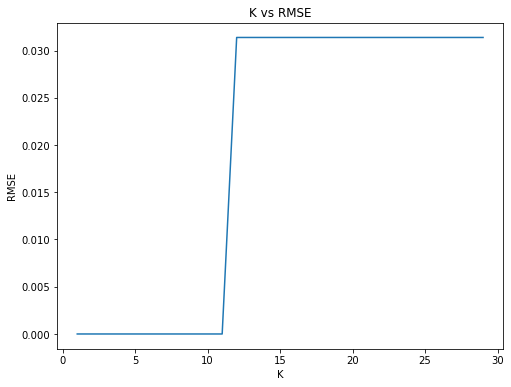

In [111]:
#model
scores = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, preds)))
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(k,knn.score(X_test,y_test)))

plt.figure(figsize = (8, 6))
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('K vs RMSE')
plt.plot(range(1,30), scores)
plt.show()

In [119]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1056
           1       0.99      0.97      0.98       975

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031



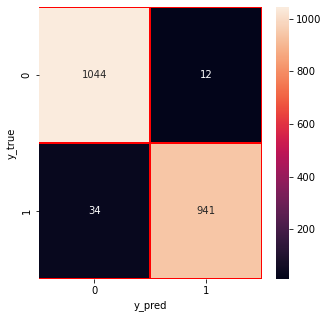

In [120]:
#plot_confusion_matrix of knn 
cm = confusion_matrix(y_test, preds)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [113]:
def plot_feature_importances(model, feat_list, ax):

  model_name = type(model).__name__
  skplt.estimators.plot_feature_importances(model, feature_names=df[feat_list].columns,
                                            title=f'{model_name} feature importances', ax=ax)
  plt.xticks(rotation=90)

# Model dla danych przygotowanych z zastosowaniem one hot encodingu i wybranych na podstawie korealcji

In [44]:
df_ohe_corr.head()

,class_e,class_p,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,ring-type_f,ring-type_l,ring-type_n,ring-type_p,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
# train - test split
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    df_ohe_corr.drop(['class_e', 'class_p'], axis=1),
    df_ohe_corr['class_p'],
    test_size=0.25,
    random_state=40)

KNeighborsClassifier: n = 1 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 2 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 3 , Accuracy is: 0.9896602658788775
KNeighborsClassifier: n = 4 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 5 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 6 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 7 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 8 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 9 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 10 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 11 , Accuracy is: 0.9886755292959133
KNeighborsClassifier: n = 12 , Accuracy is: 0.9876907927129492
KNeighborsClassifier: n = 13 , Accuracy is: 0.9876907927129492
KNeighborsClassifier: n = 14 , Accuracy is: 0.9876907927129492
KNeighborsClassifier: n = 15 , Accuracy is: 0.9876907927129492
KNeighborsClassifier: n = 16 , Accuracy is: 0.9876907927129492
K

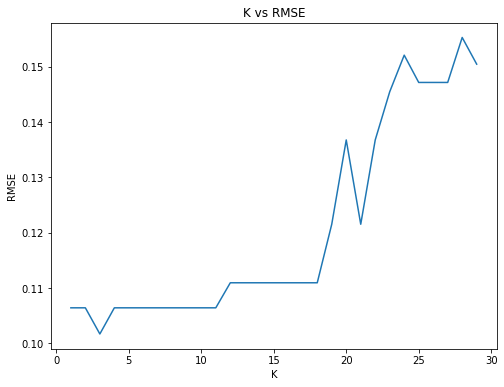

In [118]:
#model
scores = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_corr, y_train_corr)
    preds = knn.predict(X_test_corr)
    scores.append(np.sqrt(mean_squared_error(y_test_corr, preds)))
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(k,knn.score(X_test_corr,y_test_corr)))

plt.figure(figsize = (8, 6))
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('K vs RMSE')
plt.plot(range(1,30), scores)
plt.show()

In [116]:
print(metrics.classification_report(y_test_corr, preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1056
           1       0.99      0.96      0.97       975

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



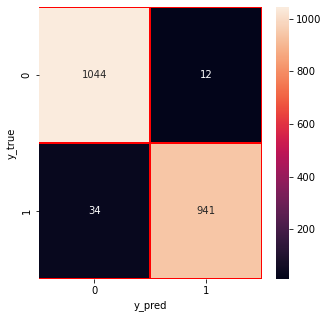

In [121]:
#plot_confusion_matrix of knn for data chosen by correlation
cm = confusion_matrix(y_test_corr, preds)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Wnioski
- Trochę lepsze wyniki testu wychodzą dla modelu dla którego dane zostały wybrane przy pomocy variance treshold.
- Gdy liczba k wynosi powyżej 11 accuracy modelu spada i rośnie błąd RMSE